The spark foundation_data science & business analytics internship

Name : K RAHUL NAIK

Batch : GRIPJULY21

Task 1 : Prediction Using supervised Machine Learning

Objective : predict the percentage of an student based on the no.of study hours.

This is the linear regression task as it involves just 2 variables.

What will be the predicted score if a student studies for 9.25 hrs/day?

Importing all necessary libraries for this task

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

importing data to perform operation

In [2]:
dataset=pd.read_csv("student_scores.csv")
print("data imported successfully")
dataset

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


DATA ANALYSIS :

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


UNDERSTANDING THE DATA :

In [5]:
dataset.sample(6)

,Hours,Scores
21,4.8,54
14,1.1,17
3,8.5,75
12,4.5,41
9,2.7,25
7,5.5,60


In [6]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.shape

(25, 2)

In [9]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

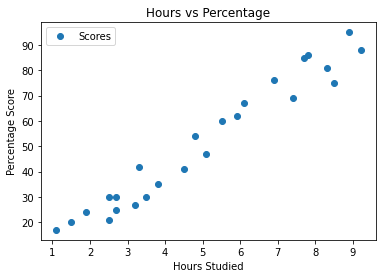

In [10]:
#Plotting the graph between distribution of scores and hours
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above  plotted graph , there looks to be correlation between the 'Marks Percentage' and 'Hours Studied' with positive slope.Hence the percentage of scores increases if hours studied increases. Lets plot a regression line to confirm the correlation.



Linear Regression Model

Now we prepare the data and split it in test data

In [11]:
#Splitting training and testing data
#defining x and y from the data
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# Spliting the Data in two
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)



TRAINING THE MODEL

In [12]:
from sklearn.linear_model import LinearRegression
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

Fitting the Data into the model

In [13]:
regression = LinearRegression()  
regression.fit(x_train, y_train) 

print("Training complete.")

Training complete.




PLOTTING THE REGRESSION LINE

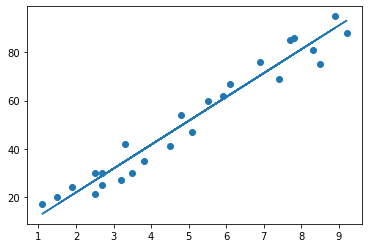

In [14]:
# Plotting the regression line
line = regression.coef_*x+regression.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()



Predicting the Percentage of Marks

In [15]:
pred_y = regression.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033




Checking the accuracy scores for training and test set

In [16]:
print('Test Score')
print(regression.score(x_test, y_test))
print('Training Score')
print(regression.score(x_train, y_train))

Test Score
0.9454906892105356
Training Score
0.9515510725211552


Comparing the Predicted Marks with the Actual Marks

In [17]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033




Visually Comparing the Predicted Marks with the Actual Marks

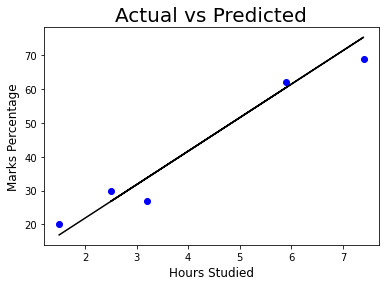

In [18]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

REGRESSION EVALUATION METRICES

Regression refers to predictive modeling problems that involve predicting a numeric value. It is different from classification that involves predicting a class label. ... Instead, you must use error metrics specifically designed for evaluating predictions made on regression problems.

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

Mean Squared Error (MSE).

Root Mean Squared Error (RMSE).

Mean Absolute Error (MAE)

MEAN SQUARED ERROR :

Mean Squared Error, or MSE for short, is a popular error metric for regression problems

MSE = 1 / N * sum for i to N (y_i – yhat_i)^2

ROOT MEAN SQUARED ERROR :

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.

RMSE = sqrt(1 / N * sum for i to N (y_i – yhat_i)^2)

MEAN ABSOLUTE ERROR :

mean absolute error, or MAE, is a popular metric because, like RMSE, the units of the error score match the units of the target value that is being predicted.

MAE = 1 / N * sum for i to N abs(y_i – yhat_i)

In [19]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


In [20]:
print('mean squared error: ' , mean_squared_error(y_test,pred_y))

mean squared error:  21.5987693072174


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test,pred_y))
print(rms)

4.6474476121003665


In [22]:
#Let's predict the score for 9.25 hpurs
print('Score of student who studied for 9.25 hours a dat', regression.predict([[9.25]]))

Score of student who studied for 9.25 hours a dat [93.69173249]




CONCLUSION

According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69173249 marks.



THANKS TO THE SPARKS FOUNDATION FOR THE OPPORTUNITY